*** Caminos más cortos - Origen: TCP Destino: CVTJ
* Ordenando por: None
   Camino óptimo: ['TCP', 'CVTJ']
    TECSUP N2 -> CLINICA VETERINARIA TERAN - JLBR
    - Distancia: 1500 metros || Precio: S/. 50 

     Distancia Total: 1500 metros || Total precio: S/. 50  

* Ordenando por: distancia
   Camino óptimo: ['TCP', 'CVTJ']
    TECSUP N2 -> CLINICA VETERINARIA TERAN - JLBR
    - Distancia: 1500 metros || Precio: S/. 50 

     Distancia Total: 1500 metros || Total precio: S/. 50  

* Ordenando por: precio
   Camino óptimo: ['TCP', 'CVTJ']
    TECSUP N2 -> CLINICA VETERINARIA TERAN - JLBR
    - Distancia: 1500 metros || Precio: S/. 50 

     Distancia Total: 1500 metros || Total precio: S/. 50  

*** Origen: TCP Destino: CVTJ
 Ordenado por: None
   Camino óptimo: ['TCP', 'CVTJ'] 
    TECSUP N2 -> CLINICA VETERINARIA TERAN - JLBR
    - Distancia: 1500 metros || Precio: S/. 50 

     Distancia Total: 1500 metros || Total precio: S/. 50  

['TCP', 'CVTJ']


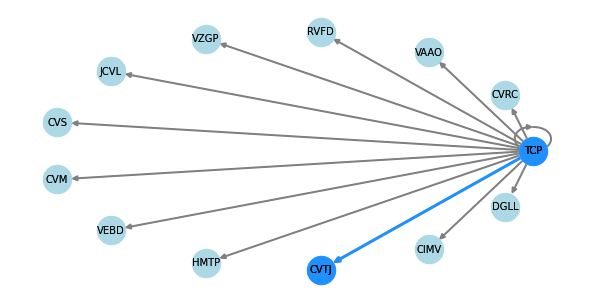

 Ordenado por: distancia
   Camino óptimo: ['TCP', 'CVTJ'] 
    TECSUP N2 -> CLINICA VETERINARIA TERAN - JLBR
    - Distancia: 1500 metros || Precio: S/. 50 

     Distancia Total: 1500 metros || Total precio: S/. 50  

['TCP', 'CVTJ']


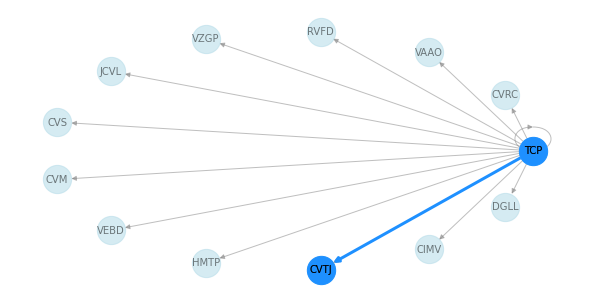

 Ordenado por: precio
   Camino óptimo: ['TCP', 'CVTJ'] 
    TECSUP N2 -> CLINICA VETERINARIA TERAN - JLBR
    - Distancia: 1500 metros || Precio: S/. 50 

     Distancia Total: 1500 metros || Total precio: S/. 50  

['TCP', 'CVTJ']


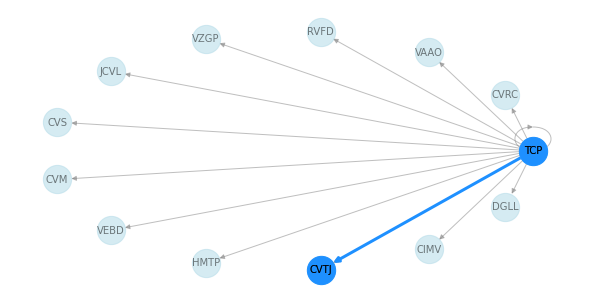

In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

size_nodes = 800
size_font = 10

plt.rcParams['figure.figsize'] = (8.0, 4.0)

url_path_pets = "https://raw.githubusercontent.com/LeonardoCoaquira/paquito/main/iata_pets_center.csv"
iata_pets = pd.read_csv(url_path_pets)
iata_pets.head()

iata_pets.set_index(["codigo"], inplace=True)
iata_pets.head()

iata_pets.loc["TCP"]

url_path_center = "https://raw.githubusercontent.com/LeonardoCoaquira/paquito/main/paths_pets_veterians.csv"
spain_flights = pd.read_csv(url_path_center)
spain_flights.head()

spain_flights.describe()

DG = nx.DiGraph()
for row in spain_flights.iterrows():
    DG.add_edge(row[1]["origen"],
                row[1]["destino"],
                distancia=row[1]["distancia"],
                precio=row[1]["precio"])

DG.nodes(data=True)

nx.draw_circular(
    DG,
    node_color="lightblue",
    edge_color="gray",
    font_size=size_font,
    width=2,
    with_labels=True,
    node_size=size_nodes,
)

list(nx.all_shortest_paths(DG, source="TCP", target="HMTP", weight=None))

list(nx.dijkstra_path(DG, source="TCP", target="HMTP", weight=None))

list(nx.dijkstra_path(DG, source="TCP", target="HMTP", weight="precio"))

list(nx.dijkstra_path(DG, source="TCP", target="HMTP", weight="distancia"))

list(nx.astar_path(DG, ("TCP"), ("HMTP"), weight="precio"))

list(nx.astar_path(DG, ("TCP"), ("HMTP"), weight="distancia"))


def show_path(path):
    total_precio = 0
    total_distancia = 0

    for i in range(len(path) - 1):
        origen = path[i]
        destino = path[i + 1]
        distancia = DG[origen][destino]["distancia"]
        precio = DG[origen][destino]["precio"]

        total_precio = total_precio + precio
        total_distancia = total_distancia + distancia
        print("    %s -> %s\n    - Distancia: %s metros || Precio: S/. %s " %
              (iata_pets.loc[origen]["nombre"],
               iata_pets.loc[destino]["nombre"], distancia, precio))

    print("\n     Distancia Total: %s metros || Total precio: S/. %s  \n" %
          (total_distancia, total_precio))


#show_path(['TCP', 'CVS', 'CVM', 'VZGP'])

#show_path(['TCP', 'VAAO', 'CVS', 'RVFD', 'DGLL'])

def get_all_shortest_paths(DiGraph, origen, destino):
    print("*** Caminos más cortos - Origen: %s Destino: %s" % (
        origen, destino
    ))
    for weight in [None, "distancia", "precio"]:
        print("* Ordenando por: %s" % weight)
        paths = list(nx.all_shortest_paths(DiGraph,
                                          source=origen,
                                          target=destino,
                                          weight=weight))
        for path in paths:
            print("   Camino óptimo: %s" % path)
            show_path(path)

get_all_shortest_paths(DG, origen="TCP", destino="CVTJ")

def plot_shortest_path(path):
    print(path)
    positions = nx.circular_layout(DG)
    
    nx.draw(DG, pos=positions,
                node_color='lightblue',
                edge_color='gray',
                font_size=size_font,
                width=1, with_labels=True, node_size=size_nodes, alpha=0.5
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                font_size=size_font,
                width=3, with_labels=True, node_size=size_nodes
           )
    plt.show()

def get_shortest_path(DiGraph, origen, destino):
    print("*** Origen: %s Destino: %s" % (origen, destino))
    
    for weight in [None, "distancia", "precio"]:
        print(" Ordenado por: %s" % weight)
        path = list(nx.astar_path(DiGraph,
                                  (origen),
                                  (destino),
                                  weight=weight
                                 ))
        print("   Camino óptimo: %s " % path)
        show_path(path)
        plot_shortest_path(path)

get_shortest_path(DG, origen="TCP", destino="CVTJ")